In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'Malgun Gothic')

In [28]:
park = pd.read_csv('./서울공원요약.csv')

In [29]:
park

,공원명,지역,경도,위도,면적,분류,크기
0,남산도시자연공원,중구,126.990377,37.550140,2896887,대형,15
1,길동생태공원,강동구,127.154779,37.540394,80683,소형,3
2,서울대공원,과천시,127.019846,37.426449,9132690,대형,15
3,서울숲,성동구,127.041798,37.543072,480994,중형,7
4,월드컵공원,마포구,126.878907,37.571805,2284085,대형,15
...,...,...,...,...,...,...,...
125,숭인근린공원,종로구,127.017827,37.576442,45615,소형,3
126,서일대뒷산공원,중랑구,127.098782,37.587716,631021,중형,7
127,용마도시자연공원(사가정공원),중랑구,127.095997,37.579762,109635,중형,7
128,문화비축기지,마포구,126.893246,37.571718,140022,중형,7


# 1. 자치구별 공원면적과 공원수

In [30]:
df = park.groupby('지역')['면적'].agg(['sum','count'])
df.columns=['공원면적', '공원수']

In [26]:
df.head()

,공원면적,공원수
지역,,
강남구,3626398,7
강동구,1526390,7
강북구,3714902,4
강서구,2194154,9
과천시,9132690,1


In [31]:
df.shape

(26, 2)

In [32]:
df.drop(index='과천시',inplace=True)

In [33]:
df.shape

(25, 2)

# 2. 구별 공원면적 비율 및 인당 공원 면적 비교

In [34]:
seoul_df = pd.read_csv('./data1/서울시 인구와 면적.txt', sep='\t')

In [35]:
seoul_df.head()

,기간,지역,인구,면적,인구밀도(명/㎢)
0,2020,합계,"9,911,088",605.23,"16,376"
1,2020,종로구,"158,996",23.91,"6,649"
2,2020,중구,"134,635",9.96,"13,517"
3,2020,용산구,"244,645",21.87,"11,188"
4,2020,성동구,"300,505",16.86,"17,822"


In [36]:
seoul_df.drop(index=0, inplace=True)
seoul_df.head()

,기간,지역,인구,면적,인구밀도(명/㎢)
1,2020,종로구,"158,996",23.91,"6,649"
2,2020,중구,"134,635",9.96,"13,517"
3,2020,용산구,"244,645",21.87,"11,188"
4,2020,성동구,"300,505",16.86,"17,822"
5,2020,광진구,"360,109",17.06,"21,105"


In [37]:
seoul_df.shape

(25, 5)

In [38]:
seoul_df.set_index('지역', inplace=True)

In [39]:
seoul_df.head()

,기간,인구,면적,인구밀도(명/㎢)
지역,,,,
종로구,2020,"158,996",23.91,"6,649"
중구,2020,"134,635",9.96,"13,517"
용산구,2020,"244,645",21.87,"11,188"
성동구,2020,"300,505",16.86,"17,822"
광진구,2020,"360,109",17.06,"21,105"


In [40]:
# 공원집계 데이터와 인구데이터를 합치기
df = df.join(seoul_df[['인구','면적']])

In [41]:
df.head()

,공원면적,공원수,인구,면적
지역,,,,
강남구,3626398,7,"544,055",39.50
강동구,1526390,7,"463,998",24.59
강북구,3714902,4,"311,569",23.60
강서구,2194154,9,"585,901",41.44
관악구,10431453,2,"509,803",29.57


In [42]:
df['면적'] = df.면적 * 1000000

In [43]:
df.head()

,공원면적,공원수,인구,면적
지역,,,,
강남구,3626398,7,"544,055",39500000.0
강동구,1526390,7,"463,998",24590000.0
강북구,3714902,4,"311,569",23600000.0
강서구,2194154,9,"585,901",41440000.0
관악구,10431453,2,"509,803",29570000.0


In [44]:
df['인구'] = df.인구.apply(lambda x : int(x.replace(',', '')))

In [45]:
df.head()

,공원면적,공원수,인구,면적
지역,,,,
강남구,3626398,7,544055,39500000.0
강동구,1526390,7,463998,24590000.0
강북구,3714902,4,311569,23600000.0
강서구,2194154,9,585901,41440000.0
관악구,10431453,2,509803,29570000.0


In [50]:
df_m = df['면적비율'] = (df['공원면적'] / df.면적) * 100
df_p = df['인당면적'] = (df['공원면적'] / df.인구)

In [51]:
df_m.head()

지역
강남구     9.180754
강동구     6.207361
강북구    15.741110
강서구     5.294773
관악구    35.277149
dtype: float64

In [52]:
df_p.head()

지역
강남구     6.665499
강동구     3.289648
강북구    11.923208
강서구     3.744923
관악구    20.461733
dtype: float64

# 시각화

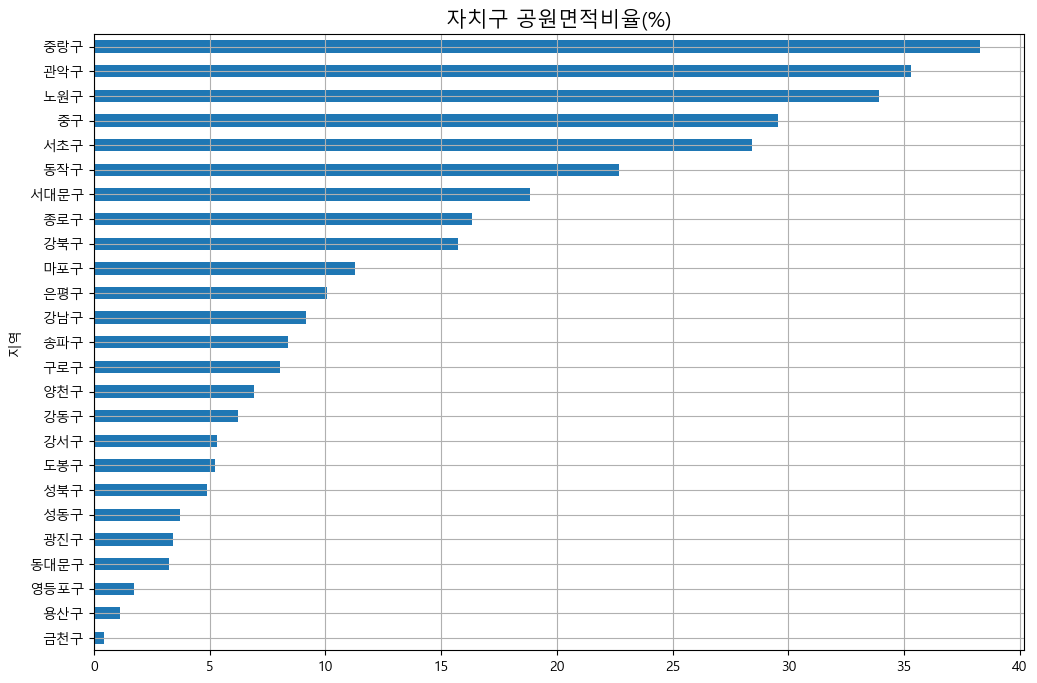

In [53]:
# 자치구별 공원 면적 비율
df.면적비율.sort_values().plot(kind='barh',
                           grid=True, figsize=(12,8))
plt.title('자치구 공원면적비율(%)', size=15)
plt.show()

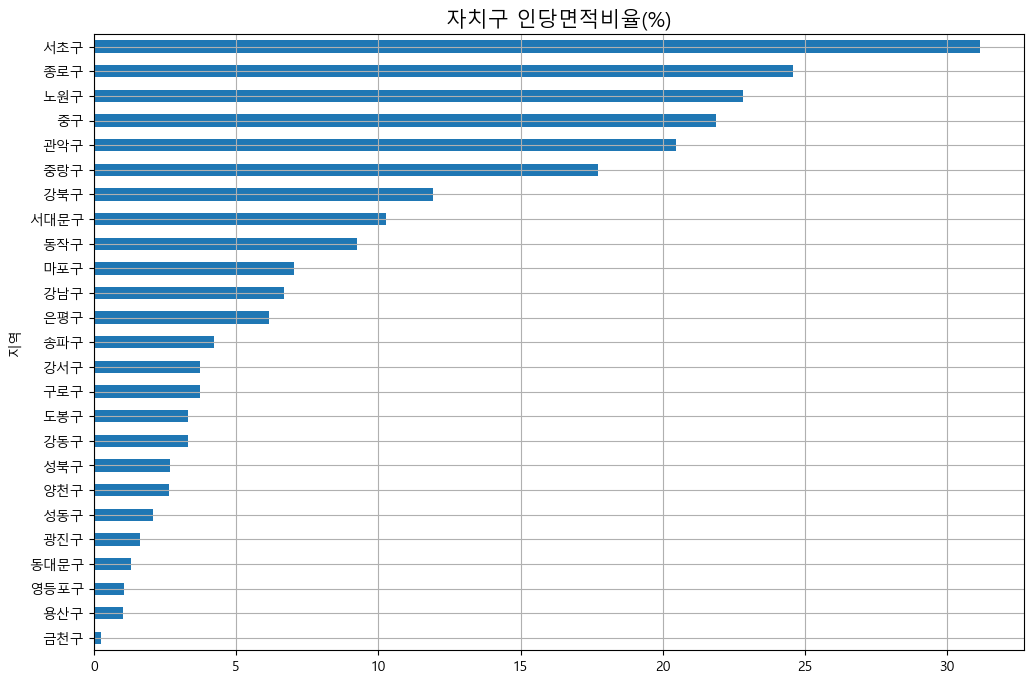

In [54]:
# 자치구별 인당 면적 비율
df.인당면적.sort_values().plot(kind='barh',
                           grid=True, figsize=(12,8))
plt.title('자치구 인당면적비율(%)', size=15)
plt.show()

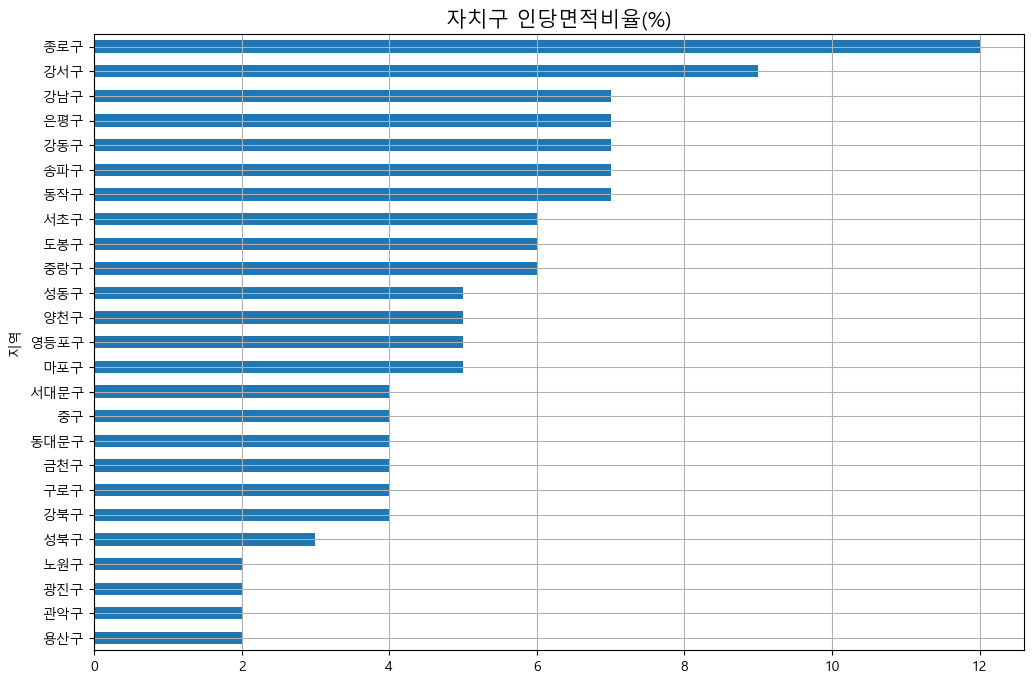

In [55]:
# 자치구별 공원 개수
df.공원수.sort_values().plot(kind='barh',
                           grid=True, figsize=(12,8))
plt.title('자치구 인당면적비율(%)', size=15)
plt.show()

In [56]:
df.to_csv('자치구별 공원 현황.csv') # index=False는 안넣기